#### 加載並檢查數據
我們將使用保險費用的（合成）數據集，看看我們是否能理解為什麼有些客戶支付的費用比其他客戶多。

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
# Path of the file to read
insurance_filepath = "insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


散點圖(Scatter plots)
要創建一個簡單的散點圖，我們使用 sns.scatterplot 命令並指定以下值：

水平 x 軸 (x=insurance_data['bmi'])，和
垂直 y 軸（y=insurance_data['charges']）。

<AxesSubplot:xlabel='bmi', ylabel='charges'>

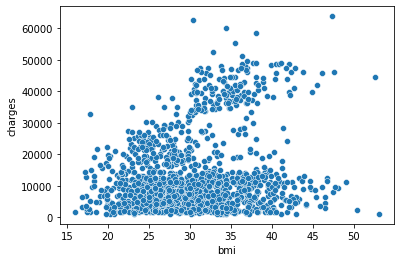

In [4]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

上面的散點圖表明，體重指數 (BMI) 和保險費用呈正相關，BMI 較高的客戶通常也傾向於支付更多的保險費用。 （這種模式是有道理的，因為高 BMI 通常與較高的慢性病風險相關。）

要仔細檢查這種關係的強度，您可能想要添加一條回歸線或最適合數據的線。 我們通過將命令更改為 sns.regplot 來做到這一點。

<AxesSubplot:xlabel='bmi', ylabel='charges'>

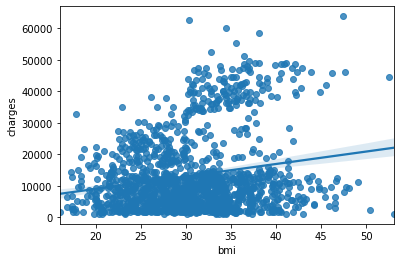

In [5]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

#### 顏色編碼的散點圖(Color-coded scatter plots)
我們可以使用散點圖來顯示（不是兩個，而是……）三個變量之間的關係！ 一種方法是對點進行顏色編碼。

例如，要了解吸煙如何影響 BMI 和保險成本之間的關係，我們可以用“吸煙者”對點進行顏色編碼，並在軸上繪製其他兩列（“bmi”、“費用”）。

<AxesSubplot:xlabel='bmi', ylabel='charges'>

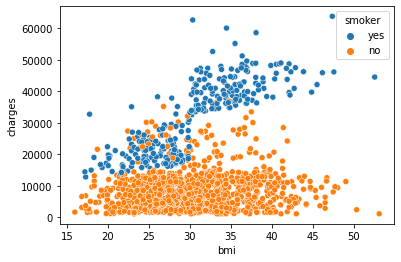

In [6]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

該散點圖顯示，雖然不吸煙者傾向於隨著 BMI 的增加支付更多的費用，但吸煙者支付的費用要高得多。

為了進一步強調這一事實，我們可以使用 **sns.lmplot** 命令添加兩條回歸線，分別對應吸煙者和非吸煙者。

***您會注意到，相對於非吸煙者的回歸線，吸煙者的回歸線具有更陡峭的斜率！）

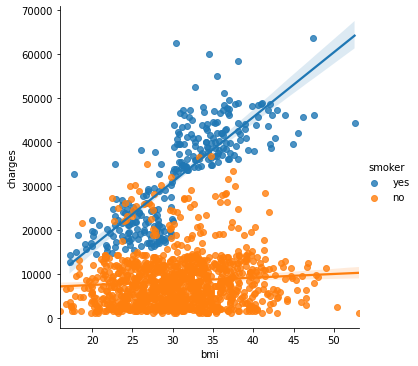

In [7]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

上面的 sns.lmplot 命令的工作方式與您目前了解的命令略有不同：

1. 我們沒有設置 x=insurance_data['bmi'] 來選擇 insurance_data 中的 'bmi' 列，而是設置 x="bmi" 來僅指定列的名稱。
2. 同樣，y="charges" 和hue="smoker" 也包含列的名稱。
3. 我們用 data=insurance_data 指定數據集。
最後，您將了解另外一個圖，它可能與您習慣於查看散點圖的方式略有不同。 通常，我們使用散點圖來突出兩個連續變量（如“bmi”和“charges”）之間的關係。 但是，我們可以調整散點圖的設計，以在主軸之一上顯示分類變量（如“吸煙者”）。 

我們將此繪圖類型稱為分類散點圖，並使用 **sns.swarmplot** 命令構建它。

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

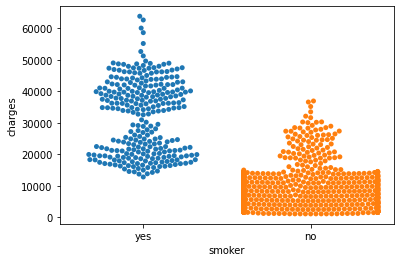

In [8]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='charges'>

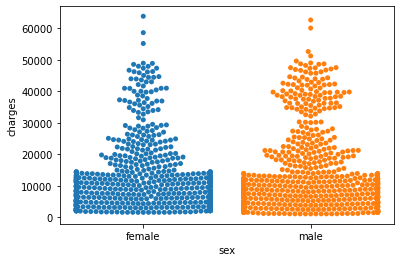

In [12]:
sns.swarmplot(x=insurance_data['sex'],
              y=insurance_data['charges'])

除其他外，該圖向我們展示了：

平均而言，非吸煙者的收費低於吸煙者，並且
支付最多的顧客是吸煙者； 而支付最少的顧客是非吸煙者。

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='sex', ylabel='charges'>

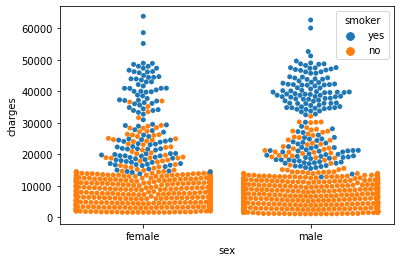

In [15]:
sns.swarmplot(x= "sex",y= "charges",hue= "smoker", data=insurance_data)